# Clustering

## KMeans

#### Taken from [scikit-learn](https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_digits.html)

In [89]:
from sklearn.datasets import load_digits
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

%matplotlib inline

### Preparing the data

In [90]:
digits = load_digits()
X = digits.data
y = digits.target

In [91]:
import numpy as np
np.unique(y)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [92]:
X.shape

(1797, 64)

In [93]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

# digits is handwritten digits from 0-9
# Note: scikit-learn uses Euclidean distance
pipeline = make_pipeline(StandardScaler(), KMeans(n_clusters=10))
clf = pipeline.fit(X)

In [94]:
from sklearn.metrics import homogeneity_score, completeness_score, v_measure_score, adjusted_mutual_info_score, adjusted_rand_score, silhouette_score

In [95]:
clustering_metric_algos = [homogeneity_score, completeness_score, v_measure_score, adjusted_mutual_info_score, adjusted_rand_score]

clustering_metrics =  [clf[-1].inertia_] + [algo(y, clf[-1].labels_) for algo in clustering_metric_algos]
clustering_metrics.append(silhouette_score(X, clf[-1].labels_, metric='euclidean', sample_size=300))

In [96]:
print("inertia\thomo\tcompl\tv-meas\tARI\tAMI\tsilhouette")
print("{:.0f}\t{:.3f}\t{:.3f}\t{:.3f}\t{:.3f}\t{:.3f}\t{:.3f}".format(*clustering_metrics))

inertia	homo	compl	v-meas	ARI	AMI	silhouette
69658	0.669	0.710	0.689	0.686	0.556	0.182


## Note PCA yields better results

In [97]:
from sklearn.decomposition import PCA

pca = PCA(n_components=10).fit(X)
pca_pipeline = make_pipeline(StandardScaler(), KMeans(init=pca.components_, n_clusters=10))
pca_clf = pca_pipeline.fit(X)

c:\Users\mjt5v\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1307: RuntimeWarning: Explicit initial center position passed: performing only one init in KMeans instead of n_init=10.
  super()._check_params(X)


In [98]:
pca_clustering_metrics =  [pca_clf[-1].inertia_] + [algo(y, pca_clf[-1].labels_) for algo in clustering_metric_algos]
pca_clustering_metrics.append(silhouette_score(X, pca_clf[-1].labels_, metric='euclidean', sample_size=300))

In [99]:
print("inertia\thomo\tcompl\tv-meas\tARI\tAMI\tsilhouette")
print("{:.0f}\t{:.3f}\t{:.3f}\t{:.3f}\t{:.3f}\t{:.3f}\t{:.3f}".format(*pca_clustering_metrics))

inertia	homo	compl	v-meas	ARI	AMI	silhouette
72713	0.637	0.659	0.648	0.644	0.521	0.146


([], [])

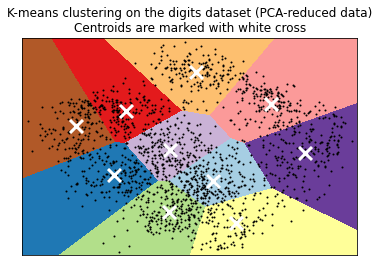

In [100]:
# plot results

mesh_step_size = 0.02

# reduce 32x32 space to 2 dims so we can visaulize

reduced_X = PCA(n_components=2).fit_transform(X)
kmeans = KMeans(n_clusters=10)
kmeans.fit(reduced_X)

x_min, x_max = reduced_X[:, 0].min() - 1, reduced_X[:, 0].max() + 1
y_min, y_max = reduced_X[:, 1].min() - 1, reduced_X[:, 1].max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, mesh_step_size), np.arange(y_min, y_max, mesh_step_size))

Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.figure(1)
plt.imshow(Z, interpolation='nearest', extent=(xx.min(), xx.max(), yy.min(), yy.max()), cmap=plt.cm.Paired, aspect='auto', origin='lower')
plt.plot(reduced_X[:, 0], reduced_X[:, 1], 'k.', markersize=2)

# Plot the centroids as a white X
centroids = kmeans.cluster_centers_
plt.scatter(
    centroids[:, 0],
    centroids[:, 1],
    marker="x",
    s=169,
    linewidths=3,
    color="w",
    zorder=10,
)
plt.title(
    "K-means clustering on the digits dataset (PCA-reduced data)\n"
    "Centroids are marked with white cross"
)
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())

## KMediods

In [101]:
# install with pip install scikit-learn-extras

from sklearn_extra.cluster import KMedoids

In [103]:
kmediods_pipeline = make_pipeline(StandardScaler(), KMedoids(n_clusters=10))
kmediods_clf = kmediods_pipeline.fit(X)
kmediods_clustering_metrics =  [kmediods_clf[-1].inertia_] + [algo(y, kmediods_clf[-1].labels_) for algo in clustering_metric_algos]
kmediods_clustering_metrics.append(silhouette_score(X, kmediods_clf[-1].labels_, metric='euclidean', sample_size=300))

print("inertia\thomo\tcompl\tv-meas\tARI\tAMI\tsilhouette")
print("{:.0f}\t{:.3f}\t{:.3f}\t{:.3f}\t{:.3f}\t{:.3f}\t{:.3f}".format(*kmediods_clustering_metrics))

inertia	homo	compl	v-meas	ARI	AMI	silhouette
11779	0.555	0.564	0.559	0.555	0.452	0.108


([], [])

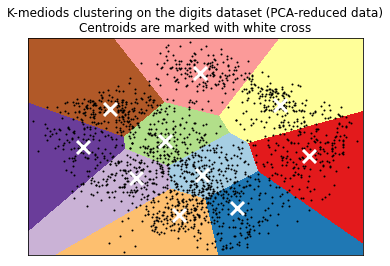

In [104]:
# plot results

mesh_step_size = 0.02

# reduce 32x32 space to 2 dims so we can visaulize

reduced_X = PCA(n_components=2).fit_transform(X)
kmediods = KMedoids(n_clusters=10)
kmediods.fit(reduced_X)

x_min, x_max = reduced_X[:, 0].min() - 1, reduced_X[:, 0].max() + 1
y_min, y_max = reduced_X[:, 1].min() - 1, reduced_X[:, 1].max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, mesh_step_size), np.arange(y_min, y_max, mesh_step_size))

Z = kmediods.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.figure(1)
plt.imshow(Z, interpolation='nearest', extent=(xx.min(), xx.max(), yy.min(), yy.max()), cmap=plt.cm.Paired, aspect='auto', origin='lower')
plt.plot(reduced_X[:, 0], reduced_X[:, 1], 'k.', markersize=2)

# Plot the centroids as a white X
centroids = kmediods.cluster_centers_
plt.scatter(
    centroids[:, 0],
    centroids[:, 1],
    marker="x",
    s=169,
    linewidths=3,
    color="w",
    zorder=10,
)
plt.title(
    "K-mediods clustering on the digits dataset (PCA-reduced data)\n"
    "Centroids are marked with white cross"
)
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())

# KNN

In [120]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

X_train, X_test, y_train, y_test = train_test_split(X, y)
pipeline = make_pipeline(PCA(n_components=10), StandardScaler(), KNeighborsClassifier(n_neighbors=10))
pipeline.fit(X_train, y_train)

y_pred = pipeline.predict(X_test)

from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_pred)

array([[51,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 46,  0,  0,  0,  0,  0,  0,  2,  0],
       [ 0,  0, 32,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 45,  0,  0,  0,  0,  4,  0],
       [ 0,  0,  0,  0, 43,  0,  0,  1,  0,  0],
       [ 0,  0,  0,  0,  0, 40,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  1, 41,  0,  1,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 43,  0,  1],
       [ 0,  6,  0,  0,  0,  0,  1,  0, 33,  0],
       [ 0,  0,  0,  1,  0,  0,  0,  0,  0, 58]], dtype=int64)

## DBScan

In [105]:
from sklearn.cluster import DBSCAN

In [115]:
dbscan_pipeline = make_pipeline(StandardScaler(), DBSCAN(eps=4.61, min_samples=5))
dbscan_clf = dbscan_pipeline.fit(X)
dbscan_clustering_metrics = [len(np.unique(dbscan_clf[-1].labels_))] + [algo(y, dbscan_clf[-1].labels_) for algo in clustering_metric_algos]
dbscan_clustering_metrics.append(silhouette_score(X, dbscan_clf[-1].labels_, metric='euclidean', sample_size=300))

print("labels\thomo\tcompl\tv-meas\tARI\tAMI\tsilhouette")
print("{:.0f}\t{:.3f}\t{:.3f}\t{:.3f}\t{:.3f}\t{:.3f}\t{:.3f}".format(*dbscan_clustering_metrics))


labels	homo	compl	v-meas	ARI	AMI	silhouette
10	0.382	0.616	0.471	0.464	0.180	-0.037


1176